<h1 align="center"><font size="5">OVERVIEW</font></h1>
## 1. Introduction
Recommender systems are active information filtering systems that **personalize the information** coming to a user based on his interests, relevance of the information, etc. Recommender systems are used widely for recommending movies, articles, restaurants, places to visit, items to buy, and more. <br>
### Story
Sisca want to buy some skin care and she has normal skin, so that she has no problems about skin care. Because there is promo on Watson. But she confused to buy the product. Then, she have friend "Laili" who work as Data Scientist and she help Sisca to solve her problem from Web Scraping.
### Definition of Algorithm
**Content-based filtering**, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. The user profile is represented with the same terms and built up by analyzing the content of items which have been seen by the user.
### 1.2 Cosine Similarity
The Cosine Similarity is used to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:
\begin{equation*}
cosine(x,y)=x.y⊺/|x||.||y||
\end{equation*}
Since the TF-IDF Vectorizer is used, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, sklearn's linear_kernel is used instead of cosine_similarities as it's much faster.

## 2. Loading Data

#### Load library

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

#### Web Scraping with Multiple Pages
Scrap the data from url website from page 1 until 3

In [2]:
p_range = range(1,3)
product_name = []
product_price = []
product_rating = []
for p in p_range:
    #define url
    url = f'https://www.watsons.co.id/c/1?q=:promotionTagCodes:promotionTagCodes:96'
    #connect to url, so that we must have internet connection
    #if the result of response is 200, the url is successful connected
    #if the result of response is 404, the url is unsuccessful connected
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    produk = soup.find_all('div', 'productItemContainer')
    try:
        for x in produk:
            name = x.find('div','h1').get_text()
            price = x.find('div','h2').get_text()
            rating = x.find('div','h4').get_text()
            product_name.append(name)
            product_price.append(price)
            product_rating.append(rating)
    except:
        continue
produk_dict = { 'product':product_name,
                'price':product_price,
                'rating':product_rating }

#### Connect to the url
We must have connection of internet

In [3]:
#if the result of response is 200, the url is successful connected
#if the result of response is 404, the url is unsuccessful connected
response = requests.get(url)
response

<Response [200]>

### 3. Data Cleaning
We should cleaning the data, so that we can easily make the content based filtering. We clean the data using regex.

In [4]:
df = pd.DataFrame(produk_dict, columns=['product','price','rating'])
df['product'].replace(r'\s\s','',regex=True, inplace=True)
df['product'].replace(r'\s\s','',regex=True, inplace=True)
df['price'].replace(r'Rp','',regex=True, inplace=True)
df['rating'].replace(r'\n','',regex=True, inplace=True)
df['rating'].replace(r'\t','',regex=True, inplace=True)
df['rating'].replace(r'\r','',regex=True, inplace=True)
df['rating'].replace(r'\(','',regex=True, inplace=True)
df['rating'].replace(r'\)','',regex=True, inplace=True)
df.head()

,product,price,rating
0,WATSONS Large Vent Hair Brush,29.500,15
1,CELEBON Collagen Essence Pomegrenate Mask 1s,13.000,2
2,CELEBON Collagen Essence Snail Mask 1s,23.500,8
3,CELEBON Collagen Essence Pearl Mask 1s,13.000,4
4,CELEBON Collagen Essence Vitamin Mask 1s,13.000,6


### 4. Sneak Peak Data

In [5]:
df.shape

(64, 3)

In [6]:
dfinal = df[['price','rating']]

In [7]:
#make the name of product become index
dfinal.index = df['product']
dfinal

,price,rating
product,,
WATSONS Large Vent Hair Brush,29.500,15
CELEBON Collagen Essence Pomegrenate Mask 1s,13.000,2
CELEBON Collagen Essence Snail Mask 1s,23.500,8
CELEBON Collagen Essence Pearl Mask 1s,13.000,4
CELEBON Collagen Essence Vitamin Mask 1s,13.000,6
...,...,...
EMINA Creamatte 07 Tumbleweed,47.500,8
EMINA Creamatte 06 Jelly Bean,47.500,13
EMINA Creamatte 05 Flamingo,47.500,4


#### Normalization
We should normalize the price because of distance between price and rating is too large

In [9]:
scaler = MinMaxScaler()
print(scaler.fit(dfinal))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [10]:
print(scaler.data_max_)

[38. 33.]


In [26]:
dfinal1 = dfinal.head(10)
dfinal1

,price,rating
product,,
ARIUL ARIUL 7DAYS MASK - TEA TREE 20GR,13.000,23
ARIUL ARIUL 7DAYS MASK - LEMON 20GR,20.500,28
ARIUL ARIUL 7DAYS MASK - GREEN TEA 20GR,13.000,10
WATSONS Large Vent Hair Brush,29.500,13
ARIUL 7 Days Mask - Pomegrenade 20g,13.000,28
CELEBON Collagen Essence Pomegrenate Mask 1s,13.000,2
FELINZ Lip Mask,13.000,29
CELEBON Collagen Essence Snail Mask 1s,23.500,6
CELEBON Collagen Essence Vitamin Mask 1s,23.500,5


In [31]:
cor = pd.DataFrame(cosine_similarity(dfinal1,dfinal1), columns=dfinal1.index, index=dfinal1.index)
data = cor.head(10)
data

product,ARIUL ARIUL 7DAYS MASK - TEA TREE 20GR,ARIUL ARIUL 7DAYS MASK - LEMON 20GR,ARIUL ARIUL 7DAYS MASK - GREEN TEA 20GR,WATSONS Large Vent Hair Brush,ARIUL 7 Days Mask - Pomegrenade 20g,CELEBON Collagen Essence Pomegrenate Mask 1s,FELINZ Lip Mask,CELEBON Collagen Essence Snail Mask 1s,CELEBON Collagen Essence Vitamin Mask 1s,CELEBON Collagen Essence Pearl Mask 1s
product,,,,,,,,,,
ARIUL ARIUL 7DAYS MASK - TEA TREE 20GR,1.000000,0.993102,0.920808,0.801337,0.996819,0.618711,0.995676,0.692126,0.662455,0.726318
ARIUL ARIUL 7DAYS MASK - LEMON 20GR,0.993102,1.000000,0.960187,0.865951,0.980599,0.706559,0.977915,0.771982,0.745719,0.801903
ARIUL ARIUL 7DAYS MASK - GREEN TEA 20GR,0.920808,0.960187,1.000000,0.971190,0.886796,0.876118,0.880594,0.918820,0.902156,0.936881
WATSONS Large Vent Hair Brush,0.801337,0.865951,0.971190,1.000000,0.751112,0.965764,0.742298,0.986403,0.978972,0.993213
ARIUL 7 Days Mask - Pomegrenade 20g,0.996819,0.980599,0.886796,0.751112,1.000000,0.554132,0.999912,0.632401,0.600647,0.669228
CELEBON Collagen Essence Pomegrenate Mask 1s,0.618711,0.706559,0.876118,0.965764,0.554132,1.000000,0.543053,0.995267,0.998376,0.989383
FELINZ Lip Mask,0.995676,0.977915,0.880594,0.742298,0.999912,0.543053,1.000000,0.622081,0.590000,0.659323
CELEBON Collagen Essence Snail Mask 1s,0.692126,0.771982,0.918820,0.986403,0.632401,0.995267,0.622081,1.000000,0.999187,0.998823
CELEBON Collagen Essence Vitamin Mask 1s,0.662455,0.745719,0.902156,0.978972,0.600647,0.998376,0.590000,0.999187,1.000000,0.996055


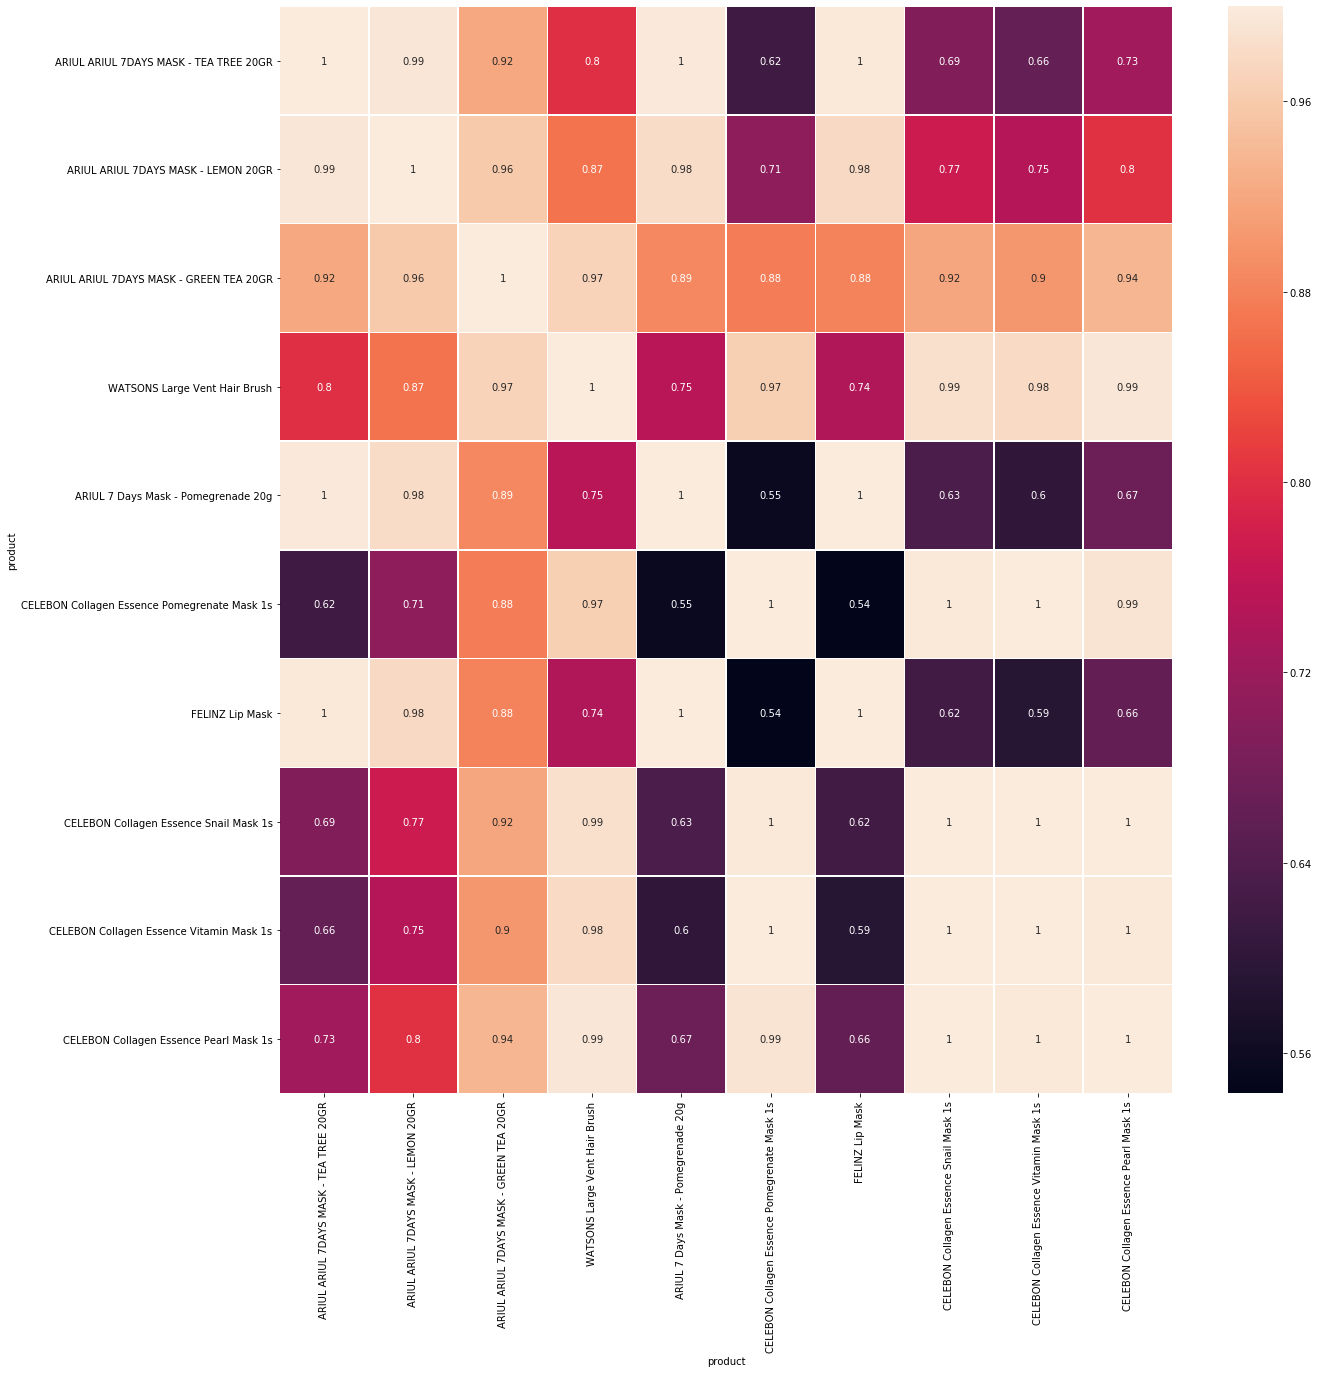

In [32]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data, annot=True, linewidths=.5, ax=ax)

<h1 align="center"><font size="5">ANALYZING THE RESULTS</font></h1>
### Advantages of Content Based Filtering
- User independence: Collaborative filtering needs other users’ ratings to find similarities between the users and then give suggestions. Instead, the content-based method only has to analyze the items and a single user’s profile for the recommendation, which makes the process less cumbersome. Content-based filtering would thus produce more reliable results with fewer users in the system.
- Transparency: Collaborative filtering gives recommendations based on other unknown users who have the same taste as a given user, but with content-based filtering items are recommended on a feature-level basis.
- No cold start: As opposed to collaborative filtering, new items can be suggested before being rated by a substantial number of users.
### Disadvantages of Content Based Filtering
- Limited content analysis: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation itself risks being imprecise.
- Over-specialization: Content-based filtering provides a limited degree of novelty, since it has to match up the features of a user’s profile with available items. In the case of item-based filtering, only item profiles are created and users are suggested items similar to what they rate or search for, instead of their past history. A perfect content-based filtering system may suggest nothing unexpected or surprising.
<h1 align="center"><font size="5">CONCLUSION</font></h1>
We have learned to make a fully-functional recommender system in Python with content-based filtering. But as we saw above, content-based filtering is not practical, or rather, not very dependable when the number of items increases along with a need for clear and differentiated descriptions. <br>
To overcome all the issues discussed earlier, we can implement collaborative filtering techniques, which have proven to be better and more scalable. We’ll work on their implementations in the upcoming parts of the series. <br>
**Suggestion** <br>
Sisca can buy the product with best rating and best price, which is:<br>
    - ARIUL ARIUL 7DAYS MASK - LEMON 20GR
    - ARIUL 7 Days Mask - Pomegrenade 20g
    - FELINZ Lip Mask